#### Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
# See available datasets:
from vega_datasets import data

print(f'{len(data.list_datasets())}')
data.list_datasets()


70


['7zip',
 'airports',
 'annual-precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'uniform-2d',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [5]:
dataset = data.seattle_weather()
dataset.describe()



,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
dataset.head(5)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [8]:
dataset.shape

(1461, 6)

In [7]:
# weather column is a categorical variable i.e you cannot apply maths on it
dataset.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_max', ylabel='Density'>

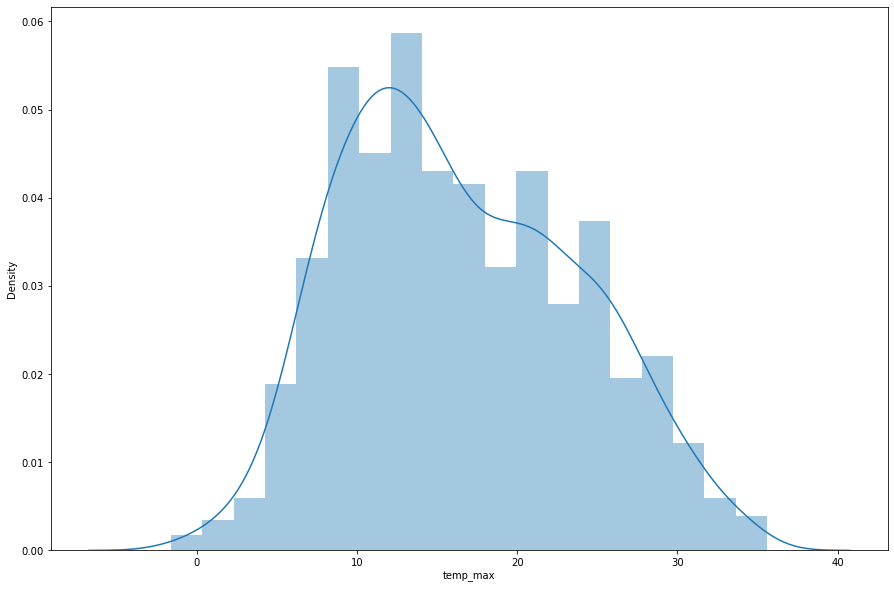

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_max'])


plt.figure(figure=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_min'])



C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_min', ylabel='Density'>

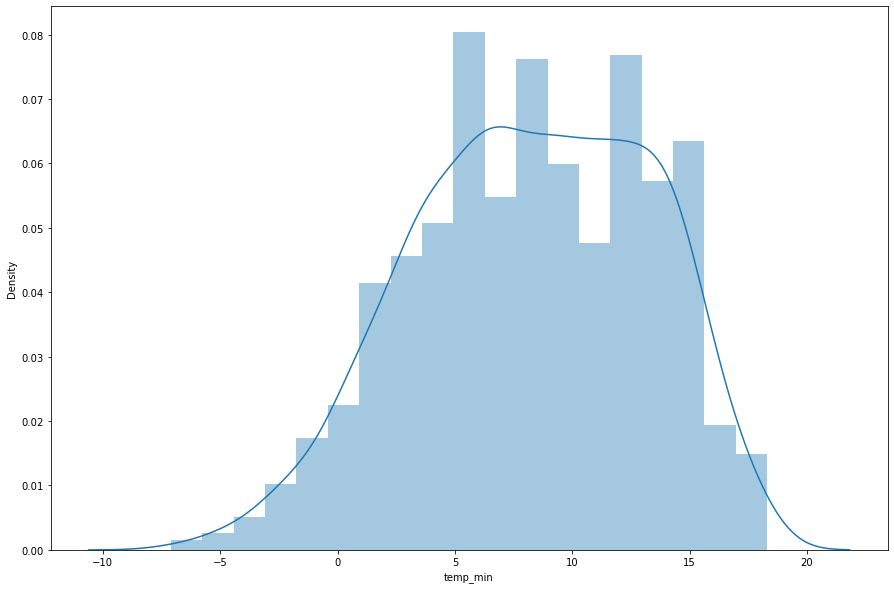

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['temp_min'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation', ylabel='Density'>

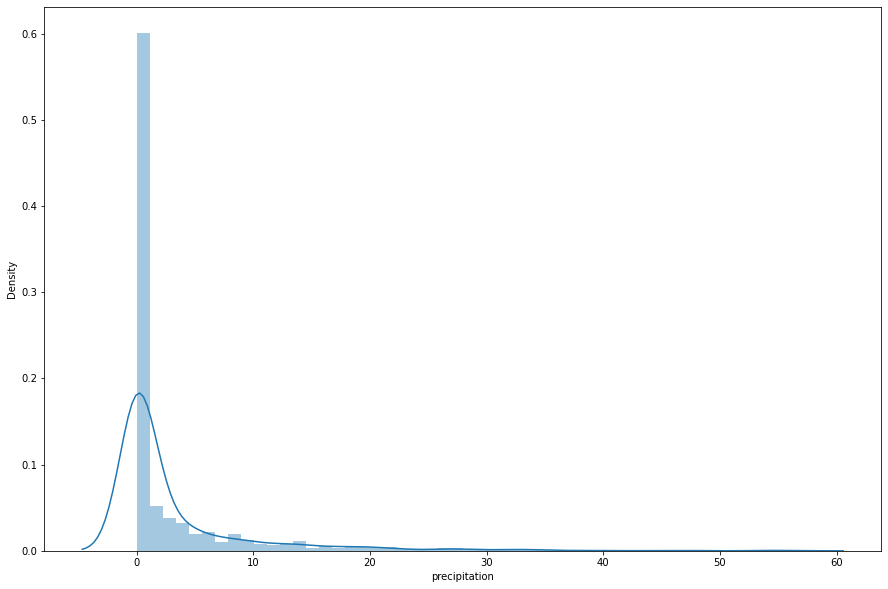

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['precipitation'])

#### Predict the precipitation given a temp_min

#### using one variable linear regression

In [23]:
# Divide the data into 'attributes' and 'label'

X = dataset['temp_min'].values.reshape(-1,1)
y = dataset['precipitation'].values.reshape(-1,1)

In [18]:
y, y.shape

(array([[ 0. ],
        [10.9],
        [ 0.8],
        ...,
        [ 0. ],
        [ 0. ],
        [ 0. ]]),
 (1461, 1))

In [24]:
X, X.shape

(array([[ 5. ],
        [ 2.8],
        [ 7.2],
        ...,
        [ 0.6],
        [-1. ],
        [-2.1]]),
 (1461, 1))

In [26]:
# Divide the data into training and testing partition
# train => 80%
# test => 20%
# use the following function imported above:
# from sklearn.model_selection import train_test_data

print(f'X : {X.shape}, y : {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print (f'X_train: {X_train.shape}')
print (f'X_test: {X_test.shape}')

print (f'y_train: {y_train.shape}')
print (f'y_test: {y_test.shape}')



X : (1461, 1), y : (1461, 1)
X_train: (1168, 1)
X_test: (293, 1)
y_train: (1168, 1)
y_test: (293, 1)


#### Normalizing the data

In [28]:
# Subtracting the mean and dividing by the std

print('Before Normalization: ')
print(f'Train: max {X_train.max()}, min {X_train.min()}')
print(f'Test: max {X_train.max()}, min {X_test.min()}')

# calculate mean and std for the training data.
train_mean = X_train.mean()
train_std = X_train.std()

# normalize train and test data
X_train_nrom = (X_train - train_mean) / train_std
X_test_nrom = (X_test - train_mean) / train_std

print('*' * 20)
print('After Normalization: ')
print(f'Train: max {X_train_nrom.max()}, min {X_train_nrom.min()}')
print(f'Test: max {X_test_nrom.max()}, min {X_test_nrom.min()}')

Before Normalization: 
Train: max 18.3, min -7.1
Test: max 18.3, min -3.9
********************
After Normalization: 
Train: max 1.994842842177979, min -3.0145443788090223
Test: max 1.8962328575128804, min -2.3834404769523925


In [31]:
# Import LinearRegression from sklearn
# Declare object of type LinearRegression()
regressor = LinearRegression()

# Fit the train examples with labelings
regressor.fit(X_train, y_train) #trainigng the algorithm



LinearRegression()

In [32]:
# Retriving the slope
print(regressor.coef_)

[[-0.07610153]]


In [33]:
print(regressor.n_features_in_)

1


In [ ]:
# Predict the unseen examples (test dataset)
y_pred = regressor.predict(X_test)


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
df1 = df.head(50)
df1.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, colour='red', linewidth=2)